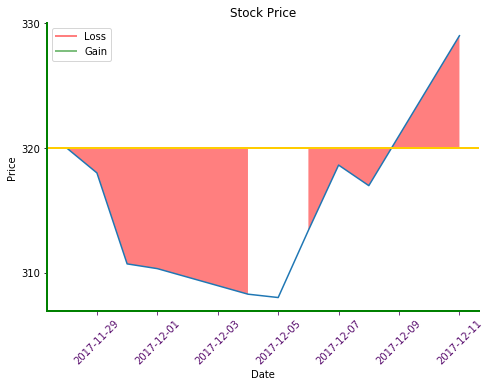

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import csv

dates = []
open_vals = []
close_vals = []
high_vals = []
low_vals = []
adj_vals = []
volumes = []

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    
    
'''
# Method - I to read csv file into sets
with open('c:/users/anand/Exercises/Ex_MatplotLib/TSLA.csv', 'r') as tsla_csv:
        rows = csv.reader(tsla_csv, delimiter=',')
        for row in rows:
            dates.append(row[0])
            open_vals.append(row[1])
            high_vals.append(row[2])
            low_vals.append(row[3])
            close_vals.append(row[4])
            adj_vals.append(row[5])
            volumes.append(row[6])
            pass

#dates, open_vals, high_vals, low_vals, close_vals, adj_vals, volumes
plt.plot_date(dates, close_vals, '-')
'''

# Method - II to read the csv file into lists
dates, open_vals, close_vals, high_vals, low_vals, adj_vals, volumes = np.loadtxt('c:/users/anand/Exercises/Ex_MatplotLib/TSLA.csv',
                                                                                 delimiter=',',
                                                                                 unpack=True,
                                                                                 converters={0: bytespdate2num('%d-%m-%y')})
# Capture the figure
fig = plt.figure()

# Refer to subplot in the figure
ax1 = plt.subplot2grid((1,1), (0,0))

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)

midVal = round((len(close_vals)/2))


# You can take customize ticks as you wish (default plot without following statement uses ticks 150, 200, 250, 300, 350, 400)
ax1.set_yticks([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400])
ax1.fill_between(dates, close_vals, close_vals[0], where = (close_vals < close_vals[midVal]), facecolor='g', alpha=0.5)
ax1.fill_between(dates, close_vals, close_vals[0], where = (close_vals > close_vals[midVal]), facecolor='r', alpha=0.5)

# Plot the graph
ax1.plot_date(dates, close_vals, '-')

# To print legend labels 
ax1.plot([], [], linewidth=2, label='Loss', color='r', alpha=0.5)
ax1.plot([], [], linewidth=2, label='Gain', color='g', alpha=0.5)

# To draw separator line between high and low
ax1.axhline(close_vals[0], color='#ffcc00', linewidth=2)

# To modify the attributes of graph borders
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)

ax1.spines['left'].set_color('g')
ax1.spines['bottom'].set_color('g')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# To modify the attributes of ticks
ax1.tick_params(axis='x', colors='#580c6d')


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price')
plt.legend()

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=.2, hspace=.2)

plt.show()
